In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import keras
import tensorflow_addons as tfa

2023-02-08 09:28:05.324189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Importing classification dataset from preprocessing folder 
data = pd.read_excel('../preprocessing/classificationData.xlsx')

In [3]:
#drop out id column
data.drop(['id number'], axis=1, inplace=True)

In [4]:
#We define X and y
X = data.drop('Recurrence',axis=1)
y = data['Recurrence']

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12053220615631960425
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6168576000
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7669498201024421933
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-02-08 09:28:07.488754: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 09:28:07.496577: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 09:28:07.511180: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 09:28:07.511365: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but th

In [6]:
X

,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,Mean fractal dimension,...,Worst perimeter,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status
0,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.000000e+00
1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.000000e+00
2,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,4.440892e-16
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,4.440892e-16
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,4.440892e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.000000e+00
194,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,4.440892e-16
195,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,4.440892e-16
196,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,3.250000e+00


<AxesSubplot: xlabel='Recurrence', ylabel='count'>

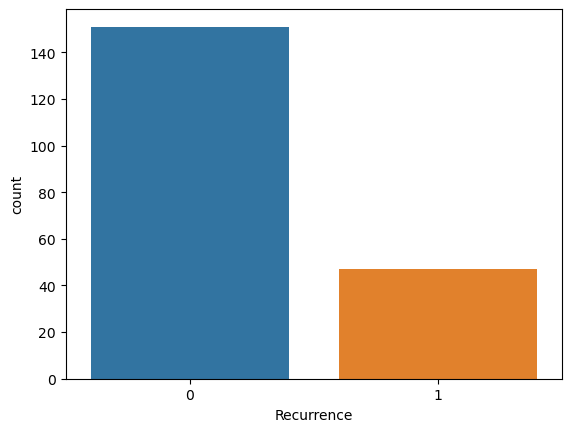

In [7]:
sns.countplot(x=y)

In [72]:
def plot_metrics(history):
  metrics = ['loss', 'recall', 'accuracy', 'fbeta_score']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [54]:
EPOCHS = 200
BATCH_SIZE = 100

In [55]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [56]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=.8)

# Initial bias so that the model does not spend time most of the labels are 0

In [57]:
np.log(y.to_list().count(1) / y.to_list().count(0))

-1.1671322351048659

In [235]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    tfa.metrics.FBetaScore(num_classes=1, beta=6.0, name='fbeta_score', threshold=.5)
]

output_bias = np.log(y.to_list().count(1) / y.to_list().count(0))

def make_model(metrics=METRICS):
    model = keras.Sequential([
        keras.layers.Normalization(),
        keras.layers.Dense(
          250, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=keras.initializers.Constant(output_bias))])

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.BinaryFocalCrossentropy(apply_class_balancing=True, alpha=.7),
        metrics=metrics)
    return model

In [236]:
model = make_model()
bias_history = model.fit(
    train_X,
    train_y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=.2,
    verbose=0)

In [237]:
mpl.rcParams['figure.figsize'] = [15, 12]

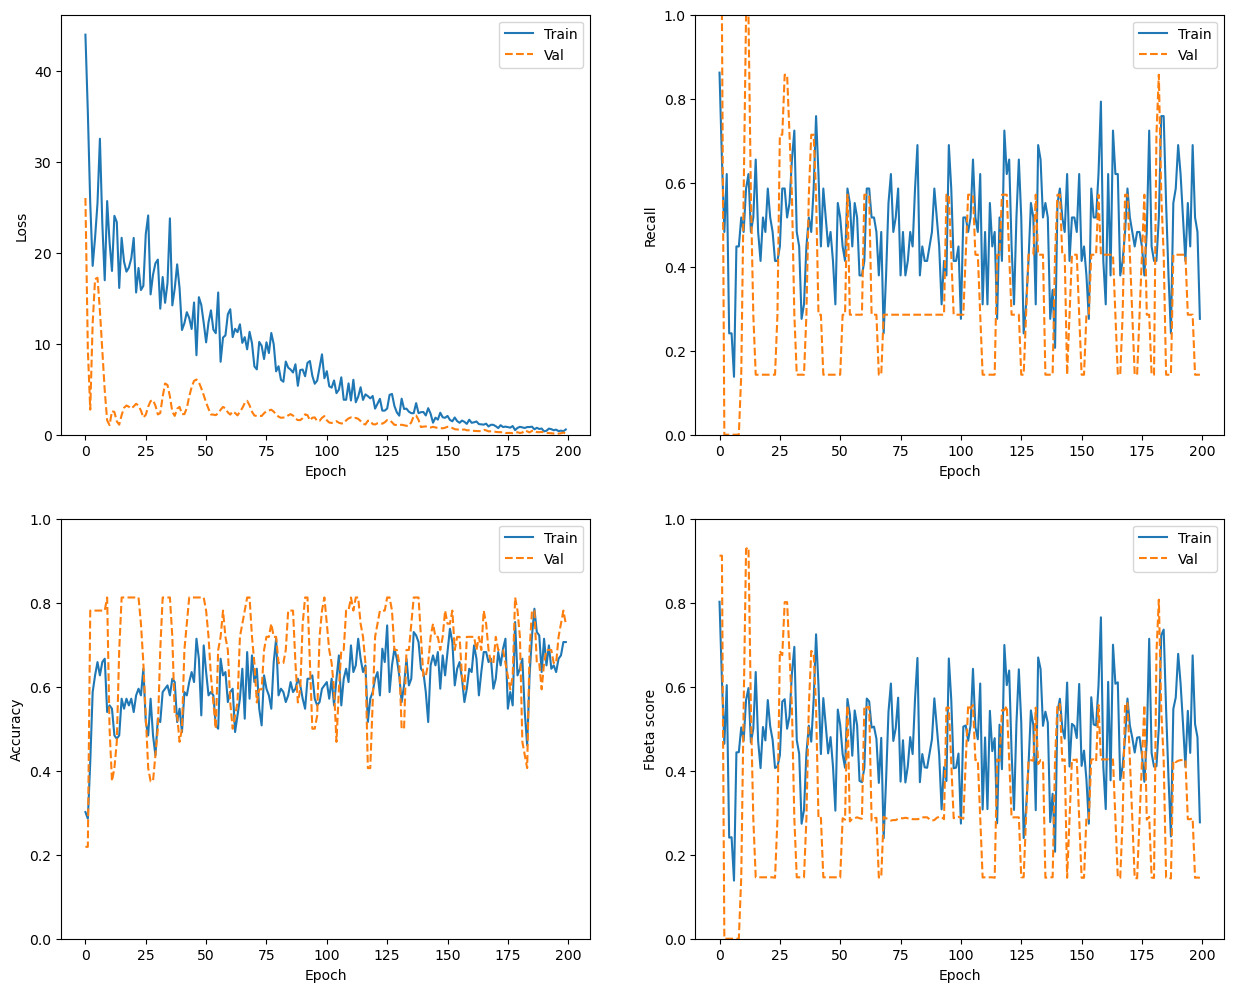

In [238]:
plot_metrics(bias_history)
plt.savefig("metricsUnweighted.png", dpi=300, bbox_inches='tight')

In [239]:
model.evaluate(train_X, train_y)

5/5 [==============================] - 0s 4ms/step - loss: 0.1338 - tp: 14.0000 - fp: 14.0000 - tn: 108.0000 - fn: 22.0000 - accuracy: 0.7722 - precision: 0.5000 - recall: 0.3889 - fbeta_score: 0.3912


[0.13381054997444153,
 14.0,
 14.0,
 108.0,
 22.0,
 0.7721518874168396,
 0.5,
 0.3888888955116272,
 array([0.39123866], dtype=float32)]

In [240]:
model.evaluate(test_X, test_y)

2/2 [==============================] - 0s 7ms/step - loss: 0.2222 - tp: 5.0000 - fp: 3.0000 - tn: 26.0000 - fn: 6.0000 - accuracy: 0.7750 - precision: 0.6250 - recall: 0.4545 - fbeta_score: 0.4579


[0.2222108393907547,
 5.0,
 3.0,
 26.0,
 6.0,
 0.7749999761581421,
 0.625,
 0.4545454680919647,
 array([0.4579208], dtype=float32)]

2/2 [==============================] - 0s 2ms/step


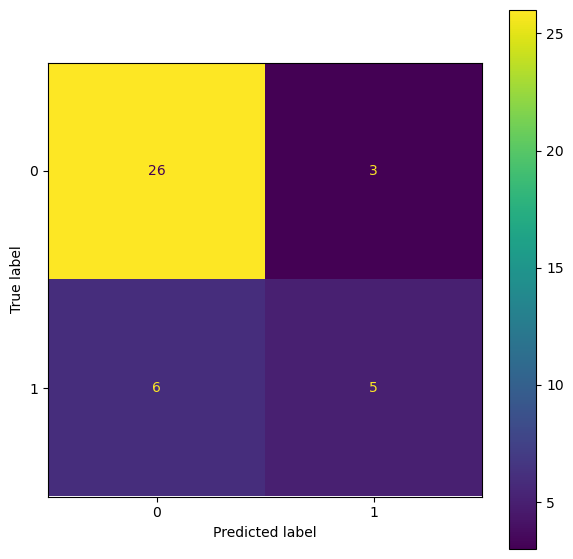

In [241]:
mpl.rcParams['figure.figsize'] = [7, 7]
ConfusionMatrixDisplay.from_predictions(test_y, model.predict(test_X) > .5)
plt.savefig("confUnweighted.png", dpi=300, bbox_inches='tight')

In [294]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    tfa.metrics.FBetaScore(num_classes=1, beta=6.0, name='fbeta_score', threshold=.5)
]

output_bias = np.log(y.to_list().count(1) / y.to_list().count(0))

def make_model(metrics=METRICS):
    model = keras.Sequential([
        keras.layers.Normalization(),
        keras.layers.Dense(
          230, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=keras.initializers.Constant(output_bias))])

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)
    return model

In [295]:
nonRecurrent = train_y.to_list().count(0)

In [296]:
recurrent = train_y.to_list().count(1)

In [297]:
total = nonRecurrent + recurrent

In [298]:
weightNr = total / (2 * nonRecurrent)
weightR = total / (2 * recurrent)

In [299]:
class_weights = {0: weightNr, 1: weightR}

In [300]:
model = make_model()
bias_history = model.fit(
    train_X,
    train_y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=.2,
    class_weight=class_weights,
    verbose=0)

In [301]:
mpl.rcParams['figure.figsize'] = [15, 12]

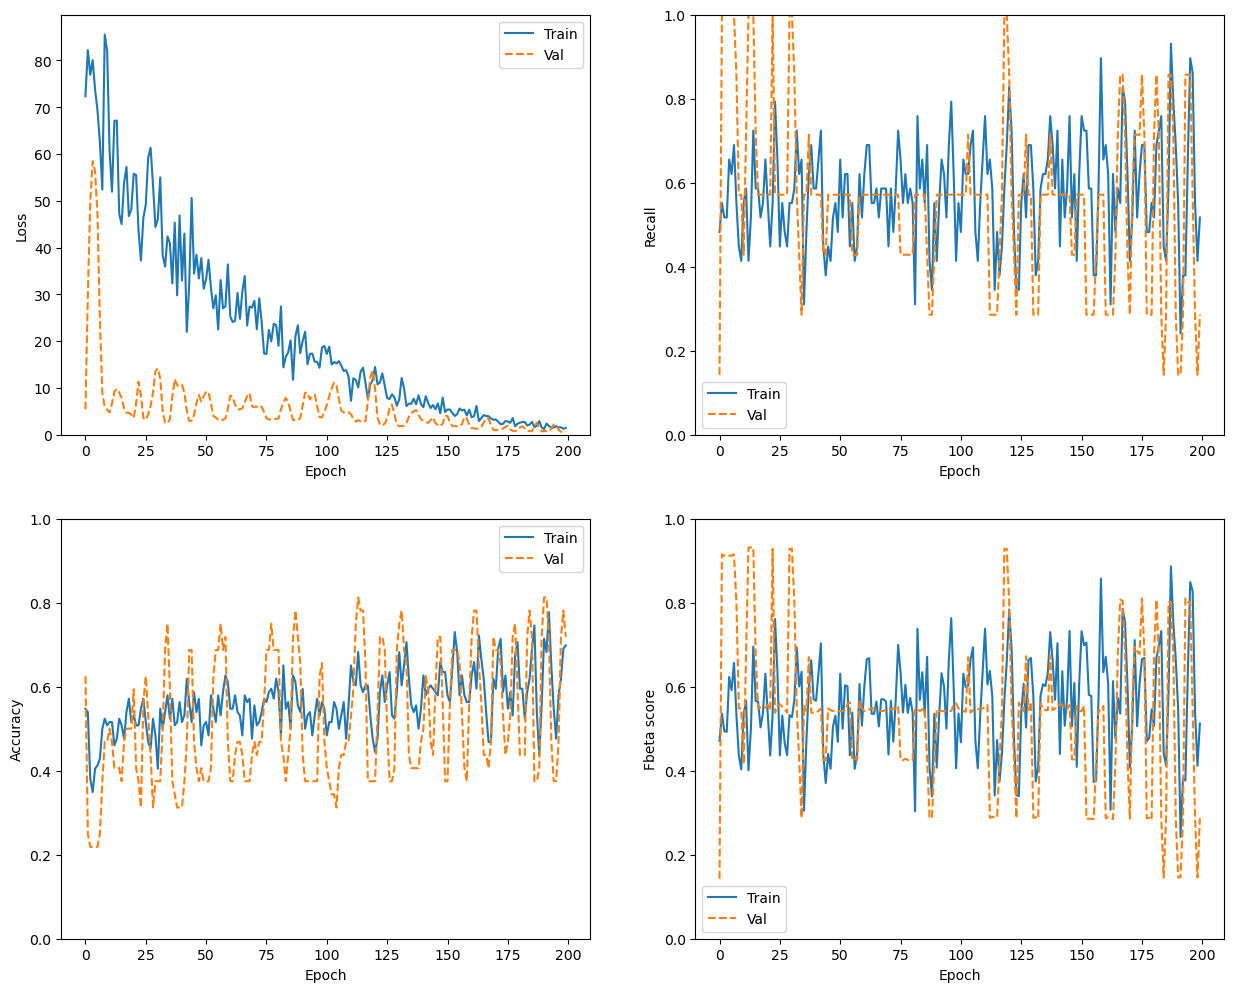

In [302]:
plot_metrics(bias_history)
plt.savefig("metricsWeighted.png", dpi=300, bbox_inches='tight')

In [303]:
model.evaluate(train_X, train_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.5332 - tp: 15.0000 - fp: 14.0000 - tn: 108.0000 - fn: 21.0000 - accuracy: 0.7785 - precision: 0.5172 - recall: 0.4167 - fbeta_score: 0.4189


[0.5332448482513428,
 15.0,
 14.0,
 108.0,
 21.0,
 0.7784810066223145,
 0.517241358757019,
 0.4166666567325592,
 array([0.4188679], dtype=float32)]

In [304]:
model.evaluate(test_X, test_y)

2/2 [==============================] - 0s 7ms/step - loss: 0.8139 - tp: 5.0000 - fp: 4.0000 - tn: 25.0000 - fn: 6.0000 - accuracy: 0.7500 - precision: 0.5556 - recall: 0.4545 - fbeta_score: 0.4568


[0.8138681650161743,
 5.0,
 4.0,
 25.0,
 6.0,
 0.75,
 0.5555555820465088,
 0.4545454680919647,
 array([0.45679012], dtype=float32)]

2/2 [==============================] - 0s 2ms/step


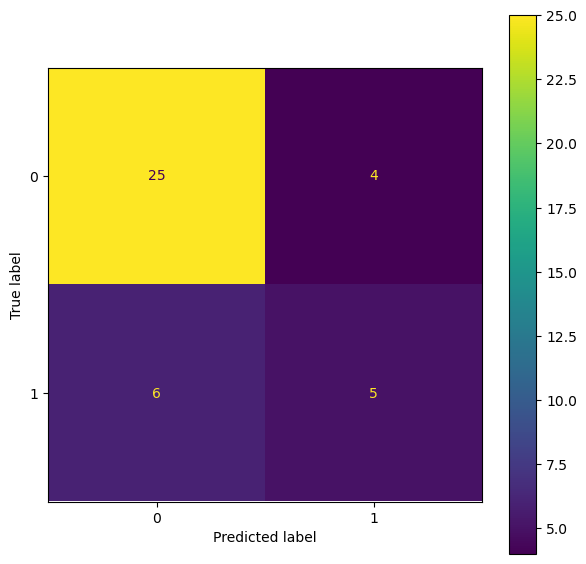

In [305]:
mpl.rcParams['figure.figsize'] = [7, 7]
ConfusionMatrixDisplay.from_predictions(test_y, model.predict(test_X) > .5)
plt.savefig("confWeighted.png", dpi=300, bbox_inches='tight')

In [319]:
mpl.rcParams['figure.figsize'] = [15, 12]

In [321]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    tfa.metrics.FBetaScore(num_classes=1, beta=6.0, name='fbeta_score', threshold=.5)
]

output_bias = np.log(y.to_list().count(1) / y.to_list().count(0))

def make_model(metrics=METRICS):
    model = keras.Sequential([
        keras.layers.Normalization(),
        keras.layers.Dense(26, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(238, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1, activation="sigmoid", bias_initializer=keras.initializers.Constant(output_bias))])

    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.BinaryFocalCrossentropy(apply_class_balancing=True, alpha=.6),
        metrics=metrics)
    return model

In [322]:
model = make_model()
bias_history = model.fit(
    train_X,
    train_y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=.2,
    class_weight=class_weights,
    verbose=0)

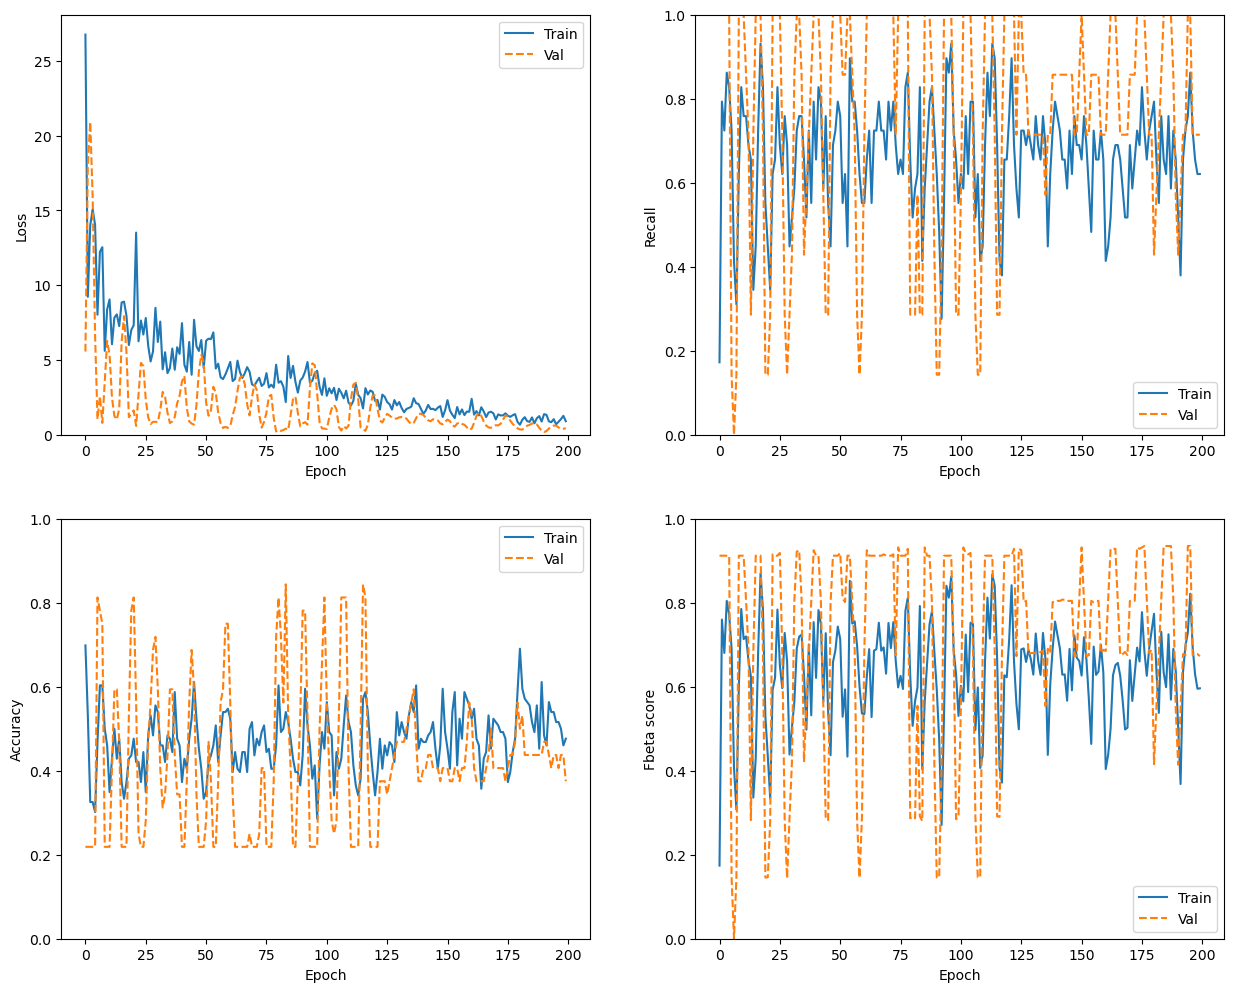

In [323]:
plot_metrics(bias_history)
plt.savefig("metricsComplex.png", dpi=300, bbox_inches='tight')

In [324]:
model.evaluate(train_X, train_y)

5/5 [==============================] - 0s 4ms/step - loss: 0.5607 - tp: 31.0000 - fp: 76.0000 - tn: 46.0000 - fn: 5.0000 - accuracy: 0.4873 - precision: 0.2897 - recall: 0.8611 - fbeta_score: 0.8175


[0.5607234835624695,
 31.0,
 76.0,
 46.0,
 5.0,
 0.4873417615890503,
 0.2897196114063263,
 0.8611111044883728,
 array([0.8175339], dtype=float32)]

In [325]:
model.evaluate(test_X, test_y)

2/2 [==============================] - 0s 6ms/step - loss: 0.8237 - tp: 10.0000 - fp: 18.0000 - tn: 11.0000 - fn: 1.0000 - accuracy: 0.5250 - precision: 0.3571 - recall: 0.9091 - fbeta_score: 0.8726


[0.8236812353134155,
 10.0,
 18.0,
 11.0,
 1.0,
 0.5249999761581421,
 0.3571428656578064,
 0.9090909361839294,
 array([0.8726415], dtype=float32)]

2/2 [==============================] - 0s 2ms/step


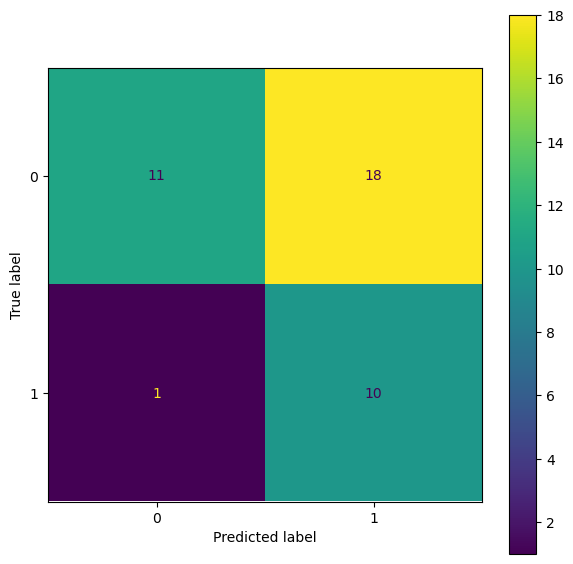

In [326]:
mpl.rcParams['figure.figsize'] = [7, 7]
ConfusionMatrixDisplay.from_predictions(test_y, model.predict(test_X) > .5)
plt.savefig("confComplex.png", dpi=300, bbox_inches='tight')